# Preparing repetition dataset

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
ednet_path = Path("ednet/conventional/all_scaled/")
mooc_path = Path("mooc/conventional/all_scaled/")

In [4]:
%%time
ednet_full = pd.read_parquet(ednet_path / "test_full.parquet").reset_index()#.droplevel(["item_consecutive_id", "session_id"]).reset_index()
mooc_full = pd.read_parquet(mooc_path / "test_full.parquet").reset_index()#droplevel(["item_consecutive_id", "session_id"]).reset_index()#.drop("concept_id", axis=1)

CPU times: user 6.64 s, sys: 2.51 s, total: 9.15 s
Wall time: 9.45 s


In [5]:
ednet_first_watches = ednet_full.drop_duplicates(subset=["user_id", "item_id"], keep="first")#.sort_values("item_id")
ednet_re_watches = ednet_full.loc[~ednet_full.index.isin(ednet_first_watches.index)]
ednet_repeated_ids = (ednet_re_watches
                    .reset_index()
                    .drop_duplicates(["user_id", "item_id"])
                    .groupby("user_id")["item_id"].agg(set)
                    .reindex(ednet_full["user_id"].unique()))

In [6]:
mooc_first_watches = mooc_full.drop_duplicates(subset=["user_id", "item_id"], keep="first")#.sort_values("item_id")
mooc_re_watches = mooc_full.loc[~mooc_full.index.isin(mooc_first_watches.index)]
mooc_repeated_ids = (mooc_re_watches
                    .reset_index()
                    .drop_duplicates(["user_id", "item_id"])
                    .groupby("user_id")["item_id"].agg(set)
                    .reindex(mooc_full["user_id"].unique()))

In [34]:
ednet_repeated_ids.isna().sum(), mooc_repeated_ids.isna().sum()

(7815, 61577)

In [35]:
ednet_repeated_ids

user_id
1             {17}
4              NaN
5              NaN
7              NaN
9         {72, 73}
            ...   
830559        {42}
830677         NaN
831416       {176}
831612         NaN
831764       {139}
Name: item_id, Length: 18194, dtype: object

In [7]:
mooc_repeated_ids

user_id
U_10001587                         {3}
U_10008027                         NaN
U_10012257                        {12}
U_10012383               {1, 2, 7, 15}
U_10013620                        {11}
                        ...           
U_998508                {16120, 21143}
U_9988528     {158355, 158356, 158358}
U_9989964                     {10, 22}
U_9996819                         {11}
U_9999820                         {10}
Name: item_id, Length: 116661, dtype: object

In [8]:
ednet_re_watches

,user_id,item_consecutive_id,session_id,time_spent,num_forward,num_backward,num_pause,median_pause,seg_rep_0,seg_rep_1,...,seg_rep_30,seg_rep_45,seg_rep_60,time_comp,time_played,replay_length,skipped_length,tags,item_id,timestamp
20,1,21,0,0.125441,-0.906035,-0.614783,0.080888,1.450162,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,1.040481,1.094451,-0.464879,-0.409175,68,17,1569641528848
83,9,3,0,-1.271417,-0.906035,-0.614783,0.080888,0.099863,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,-1.283692,-1.181287,-0.464879,-0.409175,0,72,1565163609661
88,9,8,0,-1.839475,-0.906035,-0.614783,-1.386551,-1.429254,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,-1.544320,-1.727476,-0.464879,-0.409175,0,73,1565165255376
108,11,20,0,-0.289943,-0.906035,-0.614783,-1.386551,-1.298157,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,-0.717129,0.693690,-0.464879,-0.409175,67,18,1567580537855
136,16,18,0,-1.190948,-0.906035,-0.614783,-1.386551,-1.429254,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,-1.544320,-1.727476,-0.464879,-0.409175,89,99,1563523733062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304662,828879,4,0,0.830494,1.827602,1.836998,0.080888,-0.901209,2.010382,2.049906,...,3.878292,-0.204108,-0.171998,1.039421,1.766008,2.749740,-0.186759,162,511,1574852715952
304693,829378,9,2,0.978640,-0.906035,-0.614783,-1.386551,-0.224274,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,1.040844,-0.214363,-0.464879,-0.409175,0,462,1574745658245
304697,830559,2,2,-1.376198,-0.906035,-0.614783,-1.386551,-1.429254,-0.540980,-0.523209,...,-0.257847,-0.204108,-0.171998,-1.544320,-1.727476,-0.464879,-0.409175,78,42,1574732082570
304711,831416,1,2,1.287755,1.579445,1.804612,0.080888,-0.824003,1.946023,2.009757,...,-0.257847,-0.204108,-0.171998,0.842466,0.678530,0.732916,-0.409175,183,176,1574745582250


In [9]:
mooc_re_watches

,user_id,item_consecutive_id,session_id,time_spent,num_forward,num_backward,num_pause,median_pause,std_speed,avg_speed,...,time_comp,time_played,replay_length,skipped_length,item_id,ccid,timestamp,backward_gap,concepts,fields
3,U_10001587,3,1,-1.251275,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,1.443166,...,-1.222910,-1.157828,-0.242893,-0.864354,3,3,1597824712,9210.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
4,U_10001587,3,2,1.709536,1.206407,3.562364,1.194049,1.758196,4.492985,1.272806,...,1.036840,1.162849,4.426730,-0.218420,3,3,1597829829,5097.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
15,U_10012257,3,1,0.721831,1.206407,-0.280712,1.194049,0.959437,-0.222612,-0.815718,...,-0.168207,-0.000956,-0.242893,-0.162119,12,12,1601692877,1335.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
26,U_10012383,9,1,0.256570,1.668560,3.562380,1.743546,0.902081,-0.222612,-0.815718,...,-0.364449,-0.164111,4.426737,-0.557022,2,2,1597763739,4387.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
27,U_10012383,10,0,-1.225902,-0.991139,3.562364,-1.001376,-1.012750,-0.222612,-0.815718,...,-1.216493,-1.150411,-0.242893,-0.012247,15,15,1597766543,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461665,U_9988528,5,5,-1.240117,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,1.443166,...,-1.143125,-1.065928,-0.242893,-0.864354,158358,78972,1598891221,3329.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
1461667,U_9989964,1,1,0.260822,1.024406,-0.280712,1.008584,0.900800,-0.222612,-0.815718,...,-0.445719,-0.293018,-0.242893,-0.679121,10,10,1600677624,1994.8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
1461669,U_9989964,2,1,-0.434744,1.024406,-0.280712,1.008584,0.900800,-0.222612,-0.815718,...,-0.851377,-0.735911,-0.242893,-0.568156,22,22,1600683260,1344.7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"
1461676,U_9996819,4,1,-1.211481,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,1.443166,...,-1.142633,-1.065364,-0.242893,-0.864354,11,11,1601029547,16657.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]"


In [10]:
ednet_first_watches.shape, ednet_re_watches.shape

((274396, 28), (30358, 28))

In [11]:
mooc_first_watches.shape, mooc_re_watches.shape

((1284845, 34), (176839, 34))

In [40]:
mooc_re_watches.groupby(["user_id"])["item_id"].nunique().sum()

119472

In [12]:
# Add column which indicates it is repeated or not
def is_repeated(group, repeated_ids=None):
    # user_id = group.name
    # print(user_id)
    if not isinstance(repeated_ids, set):
        return pd.DataFrame([False]*group.shape[0])
    return group["item_id"].isin(repeated_ids)


In [13]:
%%time
ednet_is_repeated_series = ednet_first_watches.groupby("user_id", group_keys=True).apply(lambda group: is_repeated(group, ednet_repeated_ids.loc[group.name])).droplevel(1)
ednet_is_repeated_series

CPU times: user 6.07 s, sys: 69.8 ms, total: 6.14 s
Wall time: 6.17 s


,0
user_id,
1,False
1,False
1,False
1,False
1,False
...,...
831764,False
831764,False
831764,False


In [36]:
ednet_is_repeated_series.value_counts()

False    248977
True      25419
dtype: int64

In [25]:
ednet_is_repeated_series.value_counts() / ednet_is_repeated_series.shape[0]

False    0.907364
True     0.092636
dtype: float64

In [19]:
%%time
mooc_is_repeated_series = mooc_first_watches.groupby("user_id", group_keys=True).apply(lambda group: is_repeated(group, mooc_repeated_ids.loc[group.name])).droplevel(1)
mooc_is_repeated_series

CPU times: user 16min 21s, sys: 1.4 s, total: 16min 22s
Wall time: 16min 30s


,0
user_id,
U_10001587,False
U_10001587,False
U_10001587,True
U_10001587,False
U_10008027,False
...,...
U_9999820,True
U_9999820,False
U_9999820,False


In [30]:
mooc_is_repeated_series.value_counts()

False    1165373
True      119472
dtype: int64

In [24]:
mooc_is_repeated_series.value_counts() / mooc_is_repeated_series.shape[0]

False    0.907014
True     0.092986
dtype: float64

In [41]:
ednet_is_repeated = ednet_first_watches.set_index("user_id").assign(is_repeated=ednet_is_repeated_series).set_index(["item_consecutive_id", "session_id"],append=True)
ednet_is_repeated

time_spent  num_forward  num_backward  \
user_id item_consecutive_id session_id                                          
1       1                   0             0.330890     0.404609     -0.614783   
        2                   0             0.407675    -0.906035     -0.614783   
        3                   0             0.479874     0.404609     -0.614783   
        4                   0             0.501002    -0.906035     -0.614783   
        5                   0             0.606064    -0.906035     -0.614783   
...                                            ...          ...           ...   
831764  10                  0             0.406388    -0.906035      1.686006   
        11                  0             0.456545    -0.906035      1.402654   
        12                  0             0.124047    -0.906035     -0.614783   
        13                  0             1.219750    -0.906035      1.402654   
        14                  0             1.004712    -0.906035      1.831212   

                                        num_pause  median_pause  seg_rep_0  \
user_id item_consecutive_id session_id                                       
1       1                   0            0.080888     -0.259707  -0.540980   
        2                   0            0.080888      1.638844  -0.540980   
        3                   0            0.080888      0.008380  -0.540980   
        4                   0            0.080888      1.350905  -0.540980   
        5                   0            0.080888      1.845111  -0.540980   
...                                           ...           ...        ...   
831764  10                  0            0.731092      0.078193   1.600651   
        11                  0            0.080888     -0.259707   1.600651   
        12                  0            0.080888      0.445468  -0.540980   
        13                  0            0.080888      0.216016   1.600651   
        14                  0            0.080888     -0.626905   2.009445   

                                        seg_rep_1  seg_rep_2  seg_rep_3  \
user_id item_consecutive_id session_id                                    
1       1                   0           -0.523209  -0.510536  -0.498528   
        2                   0           -0.523209  -0.510536  -0.498528   
        3                   0           -0.523209  -0.510536  -0.498528   
        4                   0           -0.523209  -0.510536  -0.498528   
        5                   0           -0.523209  -0.510536  -0.498528   
...                                           ...        ...        ...   
831764  10                  0            1.724741   1.816399   1.893459   
        11                  0            1.724741   1.816399   1.893459   
        12                  0           -0.523209  -0.510536  -0.498528   
        13                  0            1.724741   1.816399   1.893459   
        14                  0            2.043330   2.076690   2.108633   

                                        seg_rep_4  ...  seg_rep_45  \
user_id item_consecutive_id session_id             ...               
1       1                   0           -0.486007  ...   -0.204108   
        2                   0           -0.486007  ...   -0.204108   
        3                   0           -0.486007  ...   -0.204108   
        4                   0           -0.486007  ...   -0.204108   
        5                   0           -0.486007  ...   -0.204108   
...                                           ...  ...         ...   
831764  10                  0            1.968775  ...   -0.204108   
        11                  0            1.968775  ...   -0.204108   
        12                  0           -0.486007  ...   -0.204108   
        13                  0            1.968775  ...   -0.204108   
        14                  0            2.145195  ...    4.899369   

                                        seg_rep_60  time_comp  time_played  \
user_i

In [42]:
ednet_is_repeated.value_counts(["is_repeated"])

is_repeated
False          248977
True            25419
dtype: int64

In [43]:
mooc_is_repeated = mooc_first_watches.set_index("user_id").assign(is_repeated=mooc_is_repeated_series).set_index(["item_consecutive_id", "session_id"],append=True)
mooc_is_repeated

time_spent  num_forward  \
user_id    item_consecutive_id session_id                            
U_10001587 1                   0            -0.995890    -0.991139   
           2                   0             0.280117     1.792826   
           3                   0            -1.251275    -0.991139   
           4                   0             0.038264     0.248034   
U_10008027 1                   0             0.793144     1.624850   
...                                               ...          ...   
U_9999820  1                   0            -0.145889    -0.991139   
           2                   0            -0.290282     0.745474   
           3                   0            -0.736442    -0.991139   
           4                   0             0.889224     1.206407   
           5                   0             0.356311     0.745474   

                                           num_backward  num_pause  \
user_id    item_consecutive_id session_id                            
U_10001587 1                   0              -0.280712  -1.001376   
           2                   0               3.562380   1.845629   
           3                   0              -0.280712  -1.001376   
           4                   0              -0.280712   0.226476   
U_10008027 1                   0              -0.280712   1.624901   
...                                                 ...        ...   
U_9999820  1                   0              -0.280712  -1.001376   
           2                   0              -0.280712   0.726081   
           3                   0              -0.280712  -1.001376   
           4                   0              -0.280712   1.194049   
           5                   0              -0.280712   0.726081   

                                           median_pause  std_speed  avg_speed  \
user_id    item_consecutive_id session_id                                       
U_10001587 1                   0              -1.012750  -0.222612   1.443166   
           2                   0               0.900800   4.492985   1.433750   
           3                   0              -1.012750  -0.222612   1.443166   
           4                   0               1.204896  -0.222612   1.443166   
U_10008027 1                   0               1.378964  -0.222612  -0.815718   
...                                                 ...        ...        ...   
U_9999820  1                   0              -1.012750  -0.222612  -0.815718   
           2                   0               0.900158  -0.222612  -0.815718   
           3                   0              -1.012750  -0.222612   1.443166   
           4                   0               1.052087  -0.222612   1.443166   
           5                   0               0.931418  -0.222612   1.443166   

                                           eff_speed  seg_rep_0  seg_rep_1  \
user_id    item_consecutive_id session_id                                    
U_10001587 1                   0           -0.086449  -0.258406  -0.250737   
           2                   0           -0.259692   3.869894   3.988248   
           3                   0           -0.086449  -0.258406  -0.250737   
           4                   0           -0.086449  -0.258406  -0.250737   
U_10008027 1                   0           -0.086449  -0.258406  -0.250737   
...                                              ...        ...        ...   
U_9999820  1                   0           -0.086449  -0.258406  -0.250737   
           2                   0           -0.086449  -0.258406  -0.250737   
           3                   0           -0.086449  -0.258406  -0.250737   
           4                   0           -0.086449  -0.258406  -0.250737   
           5                   0           -0.086449  -0.258406  -0.250737   

                                           ...  time_played  replay_length  \
user_id    item_consecutive_id session_id  ...                            

In [44]:
mooc_is_repeated.value_counts(["is_repeated"])

is_repeated
False          1165373
True            119472
dtype: int64

In [45]:
ednet_is_repeated.to_parquet(ednet_path / "is_repeated.parquet")
mooc_is_repeated.to_parquet(mooc_path / "is_repeated.parquet")

# Classify predictions

## Preparing datasets
- Find duplicates - Adjust for user?
    - Theory is that the behaviour itself is the predictiveness, but must be balanced
    - Compare to bias adjusted as well then
    - For each user, select as many repeated videos as not repeated
    - Based on entire dataset and then do a new split which is stored
- Add boolean column `is_repeated`

# Load Datasets
- Decide on downsampling - User based
    - **Problem**: Only users with repeating behaviour, no users without
- Could weight samples -> Weight by fraction of interactions, e.g. user with fewer interactions could be weighted more
    - -> No need to downsample per user
- Split into train and test, kfold on train

In [10]:
%%time
ednet_rep_df = pd.read_parquet(ednet_path / "is_repeated.parquet").reset_index(level=[1,2])
mooc_rep_df = pd.read_parquet(mooc_path / "is_repeated.parquet").reset_index(level=[1,2])

CPU times: user 5.24 s, sys: 1.64 s, total: 6.88 s
Wall time: 7.03 s


In [11]:
ednet_is_repeated = ednet_rep_df[ednet_rep_df["is_repeated"]]
ednet_is_repeated_count = ednet_is_repeated.groupby("user_id").size().reindex(ednet_rep_df.index.unique()).fillna(0).astype(int)
ednet_not_repeated = ednet_rep_df[~ednet_rep_df["is_repeated"]]
ednet_not_repeated_count = ednet_not_repeated.groupby("user_id").size().reindex(ednet_rep_df.index.unique()).fillna(0).astype(int)
ednet_sample_lookup = pd.concat([ednet_is_repeated_count,ednet_not_repeated_count], axis=1).min(axis=1) 
ednet_sample_lookup

user_id
1         1
4         0
5         0
7         0
9         2
         ..
830559    1
830677    0
831416    1
831612    0
831764    1
Length: 18194, dtype: int64

In [12]:
sum([ednet_is_repeated_count.sum(), ednet_not_repeated_count.sum()])

274396

In [13]:
mooc_is_repeated = mooc_rep_df[mooc_rep_df["is_repeated"]]
mooc_is_repeated_count = mooc_is_repeated.groupby("user_id").size().reindex(mooc_rep_df.index.unique()).fillna(0).astype(int)
mooc_not_repeated = mooc_rep_df[~mooc_rep_df["is_repeated"]]
mooc_not_repeated_count = mooc_not_repeated.groupby("user_id").size().reindex(mooc_rep_df.index.unique()).fillna(0).astype(int)
mooc_sample_lookup = pd.concat([mooc_is_repeated_count,mooc_not_repeated_count], axis=1).min(axis=1) 
mooc_sample_lookup

user_id
U_10001587    1
U_10008027    0
U_10012257    1
U_10012383    4
U_10013620    1
             ..
U_998508      2
U_9988528     2
U_9989964     2
U_9996819     1
U_9999820     1
Length: 116661, dtype: int64

In [14]:
sum([mooc_is_repeated_count.sum(), mooc_not_repeated_count.sum()])

1284845

In [15]:
def sample_repetition(group, num_samples):
    return group.sample(num_samples, random_state=412)                      

In [16]:
%%time
ednet_user_sampled = (ednet_rep_df.groupby(["user_id", "is_repeated"], group_keys=False)
                          .apply(lambda group: 
                                 sample_repetition(group, 
                                                   num_samples=ednet_sample_lookup[group.name[0]])
                                )
                     )
ednet_user_sampled

CPU times: user 12.6 s, sys: 365 ms, total: 13 s
Wall time: 13.5 s


,item_consecutive_id,session_id,time_spent,num_forward,num_backward,num_pause,median_pause,seg_rep_0,seg_rep_1,seg_rep_2,...,seg_rep_45,seg_rep_60,time_comp,time_played,replay_length,skipped_length,tags,item_id,timestamp,is_repeated
user_id,,,,,,,,,,,,,,,,,,,,,
1,16,0,-1.040591,0.404609,-0.614783,0.731092,0.606006,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,1.035572,-0.069122,-0.464879,-0.273886,0,16,1569331453709,False
1,17,0,-0.082779,-0.906035,-0.614783,0.080888,1.536577,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,1.040481,1.094451,-0.464879,-0.409175,68,17,1569466590736,True
9,7,0,-0.805353,0.879886,1.402654,0.731092,-0.098056,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,-1.231600,-1.086583,-0.464879,0.518711,0,77,1565164857417,False
9,5,0,0.132727,0.879886,1.402654,0.731092,-0.158307,1.600651,1.724741,1.816399,...,-0.204108,-0.171998,1.038197,1.291396,1.739769,-0.246973,0,75,1565164252182,False
9,2,0,1.129312,1.130167,-0.614783,1.118730,1.428908,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,1.031632,0.158067,-0.464879,-0.148172,0,73,1565163277277,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830559,2,1,-1.173405,1.579445,1.402654,1.118730,-0.570386,1.870815,1.724741,1.816399,...,-0.204108,-0.171998,-1.456203,-1.419379,-0.053443,-0.296890,78,42,1574667810012,True
831416,10,0,0.321716,-0.906035,-0.614783,-1.386551,-1.429254,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,0.952110,0.748794,-0.464879,-0.409175,179,555,1574752847601,False
831416,1,1,-1.639462,-0.906035,-0.614783,0.080888,0.479598,-0.540980,-0.523209,-0.510536,...,-0.204108,-0.171998,-1.524223,-1.690132,-0.464879,-0.409175,183,176,1574692068945,True


<Axes: >

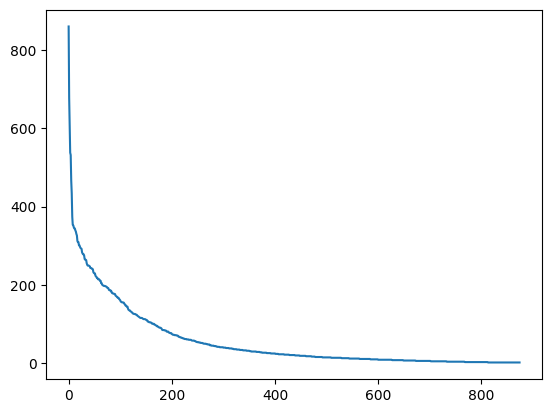

In [17]:
ednet_user_sampled.value_counts("item_id").plot(use_index=False)

In [19]:
ednet_user_sampled.index.nunique()

10355

In [21]:
%%time
mooc_user_sampled = (mooc_rep_df.groupby(["user_id", "is_repeated"], group_keys=False)
                          .apply(lambda group: 
                                 sample_repetition(group, 
                                                   num_samples=mooc_sample_lookup[group.name[0]])
                                )
                     )
mooc_user_sampled

CPU times: user 1min 27s, sys: 2.93 s, total: 1min 30s
Wall time: 1min 31s


,item_consecutive_id,session_id,time_spent,num_forward,num_backward,num_pause,median_pause,std_speed,avg_speed,eff_speed,...,time_played,replay_length,skipped_length,item_id,ccid,timestamp,backward_gap,concepts,fields,is_repeated
user_id,,,,,,,,,,,,,,,,,,,,,
U_10001587,2,0,0.280117,1.792826,3.562380,1.845629,0.900800,4.492985,1.433750,-0.259692,...,0.372170,4.426737,-0.435773,2,2,1597811595,30.25,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",False
U_10001587,3,0,-1.251275,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,1.443166,-0.086449,...,-1.157828,-0.242893,-0.864354,3,3,1597815482,0.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",True
U_10012257,2,0,0.068213,1.024406,-0.280712,1.008584,1.206098,-0.222612,-0.815718,-0.086449,...,-0.518307,-0.242893,0.267197,11,11,1601690117,70.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",False
U_10012257,3,0,-0.080863,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,-0.815718,-0.086449,...,-0.449263,-0.242893,-0.864354,12,12,1601691167,0.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",True
U_10012383,1,0,1.515243,2.159765,-0.280712,2.191608,0.959437,-0.222612,-0.815718,-0.086449,...,-0.668649,-0.242893,1.670755,14,14,1597690842,10.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U_9989964,1,0,0.120247,0.745474,-0.280712,0.726081,0.901441,-0.222612,-0.815718,-0.086449,...,-0.378803,-0.242893,-0.738713,10,10,1600674764,29.80,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",True
U_9996819,5,0,-0.843044,-0.991139,-0.280712,-1.001376,-1.012750,-0.222612,1.443166,-0.086449,...,-0.712109,-0.242893,-0.864354,12,12,1601043438,0.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",False
U_9996819,4,0,-1.154014,-0.991139,3.562364,0.226476,0.778743,4.492985,1.412364,6.607087,...,-1.045851,-0.242893,1.668231,11,11,1601012808,22.00,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",True


In [27]:
mooc_user_sampled.value_counts(["is_repeated"])

is_repeated
False          110972
True           110972
dtype: int64

In [28]:
ednet_user_sampled.value_counts(["is_repeated"])

is_repeated
False          24857
True           24857
dtype: int64

<Axes: >

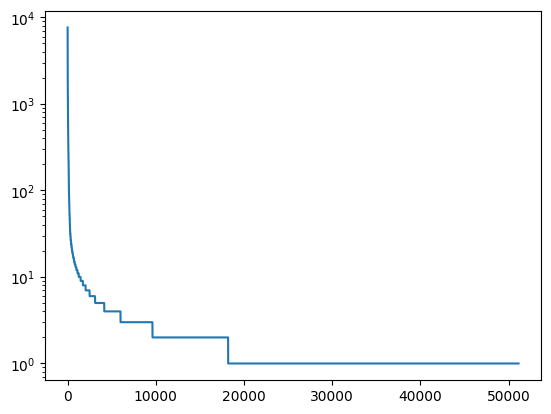

In [25]:
mooc_user_sampled.value_counts("item_id").plot(use_index=False, logy=True)

In [30]:
mooc_user_sampled.set_index(["item_consecutive_id", "session_id"],append=True).to_parquet(mooc_path / "repetition_bin_user_sampled_with_session_ids.parquet")

In [29]:
ednet_user_sampled.set_index(["item_consecutive_id", "session_id"],append=True).to_parquet(ednet_path / "repetition_bin_user_sampled_with_session_ids.parquet")

### Validate that the order of items is equal with and without session information

In [37]:
test_ednet_old = pd.read_parquet(ednet_path / "repetition_bin_user_sampled.parquet", columns=["item_id", "is_repeated"])
test_mooc_old = pd.read_parquet(mooc_path / "repetition_bin_user_sampled.parquet", columns=["item_id", "is_repeated"])

test_ednet_old


,item_id,is_repeated
user_id,,
1,16,False
1,17,True
9,77,False
9,75,False
9,73,True
...,...,...
830559,42,True
831416,555,False
831416,176,True


In [34]:
(ednet_user_sampled["item_id"]==test_ednet_old["item_id"]).all()

True

In [35]:
(ednet_user_sampled["is_repeated"]==test_ednet_old["is_repeated"]).all()

True

In [36]:
(ednet_user_sampled.index==test_ednet_old.index).all()

True

In [40]:
(mooc_user_sampled["item_id"]==test_mooc_old["item_id"]).all()

True

In [41]:
(mooc_user_sampled["is_repeated"]==test_mooc_old["is_repeated"]).all()

True

In [42]:
(mooc_user_sampled.index==test_mooc_old.index).all()

True